##TMINST character recognition
(95% Accurate)

##ABSTRACT


This notebook describes many ways for building neural networks that recognize digits on the MNIST dataset. Most deep learning frameworks include APIs for importing well-known datasets such as MNIST (for example, torchvision.datasets.MNIST in Pytorch). The APIs are useful, but they obscure an essential step in preparing training data for a deep learning framework: when transitioning from an example dataset to actual data, we must convert a training data of interest into a data structure that a deep learning framework accepts.

##Neural Network CNN Model Definition

In this notebook, the aim is to classify the images from TMNIST dataset using Convolutional Neural Network approach (CNN). **I will be using a deep learning algorithm, Convolutional Neural Networks (CNNs) with a functional model. It is one of the best architectures that is being widely used for classifying images. The reason for using a functional model is to maintain easiness while connecting the layers. Convolutional Neural Networks (CNNs) is one of the best architectures that is being used widely for classifying images. CNNs are used for pattern matching or image detection everywhere in several fields like facial recognition, self-driving cars, object detection, fashion etc. For this project, I will be designing a 2-D Convolutional Neural Network model using keras with tensorflow backend for MNIST digit recognition task. The workflow will look like

Preparing the dataset to work on

Building and compilation of the model

Training and evaluating the model**

The model has two main aspects which are the feature extraction front end comprised of convolutional and pooling layers and the classifier backend that will make a prediction. For a better understanding, model architecture that may be followed here is 2 convolution layers followed by pooling layer, a fully connected layer and softmax layer respectively. Multiple filters are used at each convolution layer, for different types of feature extraction. One intuitive explanation can be if first filter helps in detecting the straight lines in the image, second filter will help in detecting circles and so on.

In [12]:
#importing the libraries
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [7]:
#making a directory for kaggle api

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"divyamyneni123","key":"2546107efd3aa943c0b742f6638a9937"}'}

In [8]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! kaggle datasets download -d nikbearbrown/tmnist-alphabet-94-characters


tmnist-alphabet-94-characters.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip tmnist-alphabet-94-characters.zip

Archive:  tmnist-alphabet-94-characters.zip
replace 94_character_TMNIST.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: NO


The TMNIST database contains a huge number of handwritten alphabets, numerals, and special characters that are often used to train various image processing systems. This database is commonly used in the field of machine learning for training and testing. I'll be utilizing a CNN (Convolutional Neural Network) deep learning technique with a functional model. The purpose of utilizing a functional model is to keep things simple when linking the layers.

In [11]:
data = pd.read_csv("94_character_TMNIST.csv")
data.shape
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,Salsa-Regular,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MouseMemoirs-Regular,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Creepster-Regular,f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,SeoulNamsan-Light,/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HachiMaruPop-Regular,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#Dataset Characteristics
print(f"The Shape of the Dataset is: {data.shape}")
print(f"Number of Samples: {data.shape[0]}")
print(f"Number of Features: {data.shape[1]}")

The Shape of the Dataset is: (274093, 786)
Number of Samples: 274093
Number of Features: 786


In [14]:
# Number of unique character in the Dataframe
num_unique_chars = len(data.labels.unique())
print(f"Number of unique character present in the Dataset: {num_unique_chars}")

Number of unique character present in the Dataset: 94


In [15]:
#All Unique Chars
all_unique_chars = list(data.labels.unique())
print(all_unique_chars)

['6', 'D', 'f', '/', 'F', 'x', 'J', '8', 'H', 'k', '@', '1', '=', 'g', ')', '2', 'd', '^', '3', 't', '#', '.', '4', 'o', '"', 'y', 'A', 'u', 'G', '-', 'm', 'W', '&', 'c', '9', 'N', ']', 'P', 'X', '|', '}', 'h', '7', 'j', '5', '>', '?', 'b', '*', 'w', 'l', '0', '$', 'I', 'Y', '%', ':', 'T', 'K', 'E', '<', 'V', '{', 'M', 'S', 'a', 'i', 'r', "'", 'p', ';', '[', '+', 'e', 'U', '(', 's', '~', ',', 'C', 'q', '_', 'n', 'B', 'z', 'v', 'O', 'R', '`', 'Z', 'Q', 'L', '!', '\\']


In [16]:
#Drop redundant coloums (names and labels), retain only pixel values
x = data.drop(columns=['names','labels']).values
y = data[['labels']].values #Assigning Classes

In [17]:
#Convert NumPy array to Pandas Dataframe for ease of processing downstream and triaging
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)
#df_x.head()
#df_y.head()

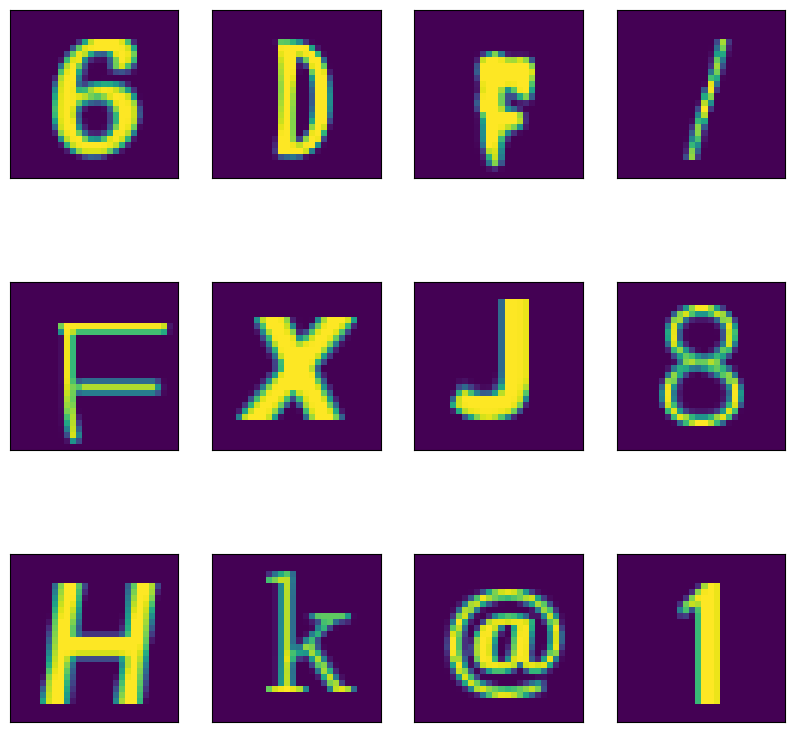

In [18]:
import matplotlib.pyplot as plt

x_images = x.reshape(-1,28,28)
fig,axs = plt.subplots(3,4,figsize=(10,10))
for i in range(12):
    r=i//4
    c=i%4
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(x_images[i])
plt.show()

Here, we can see that the dataset consists various uppercase and lowercase characters along with numbers/ digits both in english. It also contains various special characters eg. @ and = .

In this notebook, the aim is to classify the images from TMNIST dataset using Convolutional Neural Network approach (CNN). **I will be using a deep learning algorithm, Convolutional Neural Networks (CNNs) with a functional model. It is one of the best architectures that is being widely used for classifying images. The reason for using a functional model is to maintain easiness while connecting the layers. Convolutional Neural Networks (CNNs) is one of the best architectures that is being used widely for classifying images. CNNs are used for pattern matching or image detection everywhere in several fields like facial recognition, self-driving cars, object detection, fashion etc. For this project, I will be designing a 2-D Convolutional Neural Network model using keras with tensorflow backend for MNIST digit recognition task. The workflow will look like

Preparing the dataset to work on
Building and compilation of the model
Training and evaluating the model**

In [19]:
#Split dataset into Train & Test @ 80% and 20% spread respectively
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)

In [20]:
#Shape of training Data
print(f'X:Train, Test data shape:{X_train.shape},{X_test.shape}')
print(f'Y:Train, Test data shape:{y_train.shape},{y_test.shape}')

X:Train, Test data shape:(219274, 784),(54819, 784)
Y:Train, Test data shape:(219274, 1),(54819, 1)


In [21]:
#the pixel values are from 0-255, normalizing the dataset for neural network models, converting them to values between 0-1 
X_train= (X_train.astype('float32'))/255.0
X_test = (X_test.astype('float32'))/255.0

In [22]:
#encoding the y values
char_enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
y_train_encoded= char_enc.fit_transform(y_train.values.reshape(-1,1))
y_test_encoded=  char_enc.transform(y_test.values.reshape(-1,1))

In [23]:
X_train_norm=X_train.values.reshape(X_train.shape[0],28,28)
X_test_norm=X_test.values.reshape(X_test.shape[0],28,28)

In [24]:
#ModelDefinition
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 94)                3102      
                                                                 
Total params: 474,814
Trainable params: 474,814
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Fitting the basic model
model_history=model.fit(X_train_norm, y_train_encoded, epochs=20, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=140)

Epoch 1/20
1567/1567 - 19s - loss: 0.8203 - accuracy: 0.7858 - val_loss: 0.4985 - val_accuracy: 0.8540 - 19s/epoch - 12ms/step
Epoch 2/20
1567/1567 - 16s - loss: 0.4434 - accuracy: 0.8648 - val_loss: 0.4369 - val_accuracy: 0.8636 - 16s/epoch - 10ms/step
Epoch 3/20
1567/1567 - 16s - loss: 0.3731 - accuracy: 0.8804 - val_loss: 0.3785 - val_accuracy: 0.8848 - 16s/epoch - 10ms/step
Epoch 4/20
1567/1567 - 16s - loss: 0.3276 - accuracy: 0.8925 - val_loss: 0.3651 - val_accuracy: 0.8869 - 16s/epoch - 10ms/step
Epoch 5/20
1567/1567 - 18s - loss: 0.2960 - accuracy: 0.9013 - val_loss: 0.3472 - val_accuracy: 0.8934 - 18s/epoch - 11ms/step
Epoch 6/20
1567/1567 - 17s - loss: 0.2678 - accuracy: 0.9089 - val_loss: 0.3393 - val_accuracy: 0.8964 - 17s/epoch - 11ms/step
Epoch 7/20
1567/1567 - 15s - loss: 0.2469 - accuracy: 0.9145 - val_loss: 0.3351 - val_accuracy: 0.8989 - 15s/epoch - 10ms/step
Epoch 8/20
1567/1567 - 18s - loss: 0.2298 - accuracy: 0.9205 - val_loss: 0.3379 - val_accuracy: 0.8994 - 18s/ep

In [27]:
#Evaluating model accuracy on test data
score = model.evaluate(X_test_norm, y_test_encoded,verbose=2)
print(f"Test Accuracy:{round(score[1],4)*100}%")

1714/1714 - 6s - loss: 0.3841 - accuracy: 0.9110 - 6s/epoch - 4ms/step
Test Accuracy:91.10000000000001%


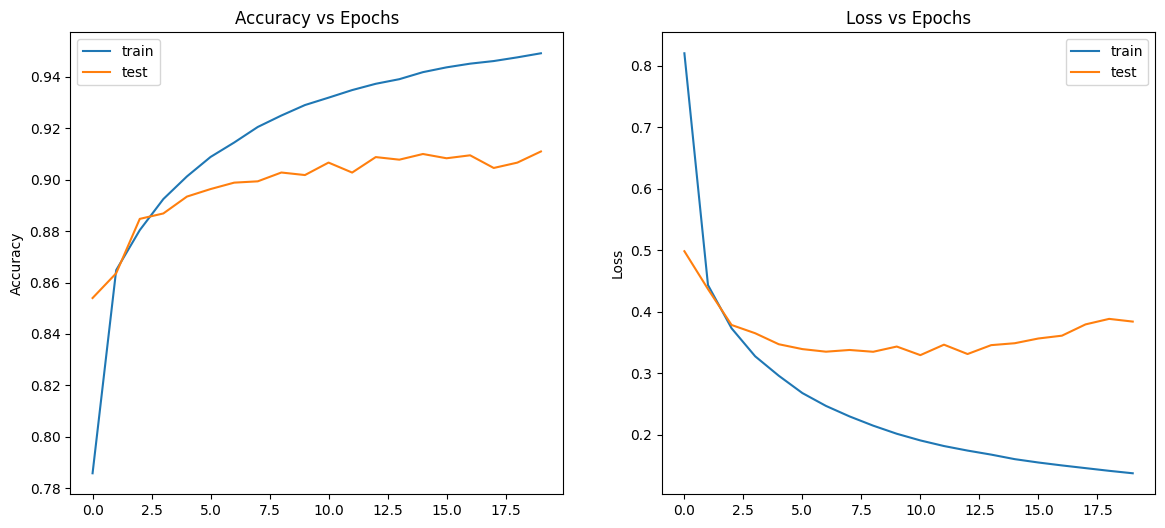

In [28]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [29]:
cnn_model = Sequential()
cnn_model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(28, 28,1)))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(32, activation='relu'))
cnn_model.add(Dense(num_unique_chars, activation='softmax'))
opt = Adam()
cnn_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [30]:
#normalizing data for CNN model
X_train_norm=X_train_norm.reshape((X_train_norm.shape[0],28,28,1))
X_test_norm=X_test_norm.reshape((X_test_norm.shape[0],28,28,1))

In [ ]:
#fitting the model
model_history2=cnn_model.fit(X_train_norm, y_train_encoded, epochs=15, validation_data=(X_test_norm, y_test_encoded), verbose=2,batch_size=128)

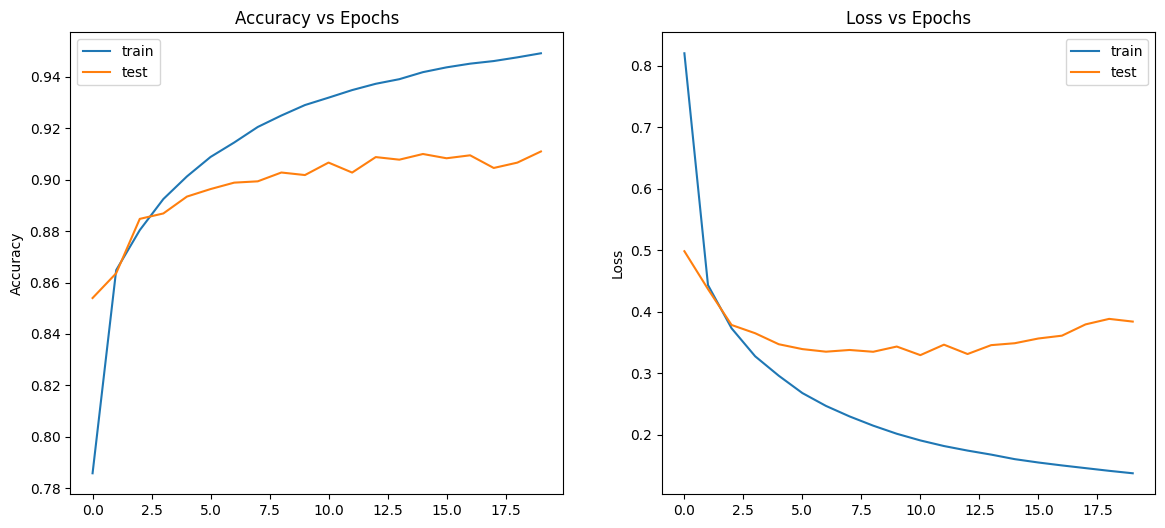

In [32]:
#Plotting Results
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
epochs=np.arange(20)
plt.title('Accuracy vs Epochs')
plt.plot(epochs,model_history.history['accuracy'],label='train')
plt.ylabel('Accuracy')
plt.plot(epochs,model_history.history['val_accuracy'],label='test')
plt.legend()
plt.subplot(1,2,2)
plt.title('Loss vs Epochs')
plt.plot(epochs,model_history.history['loss'],label='train')
plt.ylabel('Loss')
plt.plot(epochs,model_history.history['val_loss'],label='test')
plt.legend()
plt.show()

References

https://www.kaggle.com/code/rushabhfegade/tmnist-glyphs


https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939


Copyright (C) <2023> Divya Myneni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE